## Ch8. The Bag-of-Words Model

#### Example of the Bag-of-Words Model

- Step 1: Collect Data
- Step 2: Design the Vocabulary
- Step 3: Create Document Vectors

### 8.6 Scoring Words
- Counts : Count the number of times each word appears in a document
- Frequencies : Calculate the frequency that each word appears in a document out of all the words in the document

#### 8.6.1 Word Hashing
 Words are hashed deterministically to the same integer index in the target hash space. A binary score or count can then be used to score the word. This is called the *hash trick or feature hashing*.

#### 8.6.2 TF-IDF
A problem with scoring word frequency is that highly frequent words start to dominate in the
document (e.g. larger score), but may not contain as much *informational content* to the model
as rarer but perhaps domain speci c words. One approach is to rescale the frequency of words
by how often they appear in all documents, so that the scores for frequent words like the that
are also frequent across all documents are penalized.

- **Term Frequency**: is a scoring of the frequency of the word in the current document.
- **Inverse Document Frequency**: is a scoring of how rare the word is acc=ross documents.

### 8.7 Limitations of Bag-of-Words
- **Vocabulary**: The vocabulary requires careful design, most speci cally in order to manage
the size, which impacts the sparsity of the document representations.
- **Sparsity**: Sparse representations are harder to model both for computational reasons
(space and time complexity) and also for information reasons, where the challenge is for
the models to harness so little information in such a large representational space.
- **Meaning**: Discarding word order ignores the context, and in turn meaning of words in
the document (semantics). Context and meaning can o er a lot to the model, that if
modeled could tell the di erence between the same words di erently arranged (this is
interesting vs is this interesting), synonyms (old bike vs used bike), and much more.

## Ch9. How to Prepare Movie Review Data for Sentiment Analysis

### 9.3 Load Text Data

In [8]:
import os
import re
import string
from nltk.corpus import stopwords

In [6]:
# load one file
file_name = os.path.join('..', 'data', 'review_polarity', 'txt_sentoken', 'neg', 'cv000_29416.txt')

# open the file as read only
file = open(file_name, 'r')

# read all text
text = file.read()

# close the file
file.close()

In [9]:
# load doc into memory
def load_doc(filename):
    # open the file as read only
    file = open(filename, 'r')
    
    # read all text
    text = file.read()
    
    # close the file
    file.close()
    
    return text

In [9]:
# Specify directory to load
directory = os.path.join('..', 'data', 'review_polarity', 'txt_sentoken', 'neg')

# Walk through all files in the folder
for filename in os.listdir(directory):
    # skip files that do not have the right extension
    if not filename.endswith(".txt"):
        next
    # create the full path of the file to open
    path = os.path.join(directory, filename)
    
    # load document
    doc = load_doc(path)
    print(f'Loaded {filename}')

Loaded cv676_22202.txt
Loaded cv839_22807.txt
Loaded cv155_7845.txt
Loaded cv465_23401.txt
Loaded cv398_17047.txt
Loaded cv206_15893.txt
Loaded cv037_19798.txt
Loaded cv279_19452.txt
Loaded cv646_16817.txt
Loaded cv756_23676.txt
Loaded cv823_17055.txt
Loaded cv747_18189.txt
Loaded cv258_5627.txt
Loaded cv948_25870.txt
Loaded cv744_10091.txt
Loaded cv754_7709.txt
Loaded cv838_25886.txt
Loaded cv131_11568.txt
Loaded cv401_13758.txt
Loaded cv523_18285.txt
Loaded cv073_23039.txt
Loaded cv688_7884.txt
Loaded cv664_4264.txt
Loaded cv461_21124.txt
Loaded cv909_9973.txt
Loaded cv939_11247.txt
Loaded cv368_11090.txt
Loaded cv185_28372.txt
Loaded cv749_18960.txt
Loaded cv836_14311.txt
Loaded cv322_21820.txt
Loaded cv789_12991.txt
Loaded cv617_9561.txt
Loaded cv288_20212.txt
Loaded cv464_17076.txt
Loaded cv904_25663.txt
Loaded cv866_29447.txt
Loaded cv429_7937.txt
Loaded cv212_10054.txt
Loaded cv007_4992.txt
Loaded cv522_5418.txt
Loaded cv109_22599.txt
Loaded cv753_11812.txt
Loaded cv312_29308.tx

Loaded cv737_28733.txt
Loaded cv057_7962.txt
Loaded cv631_4782.txt
Loaded cv221_27081.txt
Loaded cv262_13812.txt
Loaded cv446_12209.txt
Loaded cv013_10494.txt
Loaded cv095_28730.txt
Loaded cv833_11961.txt
Loaded cv856_28882.txt
Loaded cv215_23246.txt
Loaded cv812_19051.txt
Loaded cv875_5622.txt
Loaded cv573_29384.txt
Loaded cv281_24711.txt
Loaded cv348_19207.txt
Loaded cv734_22821.txt
Loaded cv253_10190.txt
Loaded cv636_16954.txt
Loaded cv957_9059.txt
Loaded cv145_12239.txt
Loaded cv332_17997.txt
Loaded cv802_28381.txt
Loaded cv026_29229.txt
Loaded cv810_13660.txt
Loaded cv229_15200.txt
Loaded cv014_15600.txt
Loaded cv439_17633.txt
Loaded cv422_9632.txt
Loaded cv900_10800.txt
Loaded cv530_17949.txt
Loaded cv455_28866.txt
Loaded cv204_8930.txt
Loaded cv453_10911.txt
Loaded cv625_13518.txt
Loaded cv805_21128.txt
Loaded cv471_18405.txt
Loaded cv961_5578.txt
Loaded cv425_8603.txt
Loaded cv637_13682.txt
Loaded cv826_12761.txt
Loaded cv251_23901.txt
Loaded cv788_26409.txt
Loaded cv300_23302.

### 9.4 Clean Text Data

#### Split into Tokens

In [11]:
# Load the docuemnt
file_name = os.path.join('..', 'data', 'review_polarity', 'txt_sentoken', 'neg', 'cv000_29416.txt')

text = load_doc(file_name)

# Split into tokens by white space
tokens = text.split()
print(tokens[:100])

['plot', ':', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party', ',', 'drink', 'and', 'then', 'drive', '.', 'they', 'get', 'into', 'an', 'accident', '.', 'one', 'of', 'the', 'guys', 'dies', ',', 'but', 'his', 'girlfriend', 'continues', 'to', 'see', 'him', 'in', 'her', 'life', ',', 'and', 'has', 'nightmares', '.', "what's", 'the', 'deal', '?', 'watch', 'the', 'movie', 'and', '"', 'sorta', '"', 'find', 'out', '.', '.', '.', 'critique', ':', 'a', 'mind-fuck', 'movie', 'for', 'the', 'teen', 'generation', 'that', 'touches', 'on', 'a', 'very', 'cool', 'idea', ',', 'but', 'presents', 'it', 'in', 'a', 'very', 'bad', 'package', '.', 'which', 'is', 'what', 'makes', 'this', 'review', 'an', 'even', 'harder', 'one', 'to', 'write', ',', 'since', 'i']


In [16]:
# prepare regex for char filtering
re_punc = re.compile('[%s]' % re.escape(string.punctuation))

# remove punctuation from each word
tokens = [re_punc.sub('', w) for w  in tokens]

# remove remaining tokens that are not alphabetic
tokens = [word for word in tokens if word.isalpha()]

# filter out stop words
stop_words = set(stopwords.words('english'))
tokens = [w for w in tokens if w not in stop_words]

# filter out short tokens
tokens = [word for word in tokens if len(word) > 1]

print(tokens[:100])

['plot', 'two', 'teen', 'couples', 'go', 'church', 'party', 'drink', 'drive', 'get', 'accident', 'one', 'guys', 'dies', 'girlfriend', 'continues', 'see', 'life', 'nightmares', 'whats', 'deal', 'watch', 'movie', 'sorta', 'find', 'critique', 'mindfuck', 'movie', 'teen', 'generation', 'touches', 'cool', 'idea', 'presents', 'bad', 'package', 'makes', 'review', 'even', 'harder', 'one', 'write', 'since', 'generally', 'applaud', 'films', 'attempt', 'break', 'mold', 'mess', 'head', 'lost', 'highway', 'memento', 'good', 'bad', 'ways', 'making', 'types', 'films', 'folks', 'didnt', 'snag', 'one', 'correctly', 'seem', 'taken', 'pretty', 'neat', 'concept', 'executed', 'terribly', 'problems', 'movie', 'well', 'main', 'problem', 'simply', 'jumbled', 'starts', 'normal', 'downshifts', 'fantasy', 'world', 'audience', 'member', 'idea', 'whats', 'going', 'dreams', 'characters', 'coming', 'back', 'dead', 'others', 'look', 'like', 'dead', 'strange', 'apparitions']


In [10]:
def clean_doc(doc):
    # split into tokens by white space
    tokens = doc.split()
    
    # prepare regex for char filtering
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    
    # remove punctuation from each word
    tokens = [re_punc.sub('', word) for word in tokens]
    
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # filter out short tokens
    tokens = [word for word in tokens if len(word) > 1]
    
    return tokens

In [12]:
# load the document
file_name = os.path.join('..', 'data', 'review_polarity', 'txt_sentoken', 'pos', 'cv000_29590.txt')
text = load_doc(file_name)
tokens = clean_doc(text)

print(tokens[:100])

['films', 'adapted', 'comic', 'books', 'plenty', 'success', 'whether', 'theyre', 'superheroes', 'batman', 'superman', 'spawn', 'geared', 'toward', 'kids', 'casper', 'arthouse', 'crowd', 'ghost', 'world', 'theres', 'never', 'really', 'comic', 'book', 'like', 'hell', 'starters', 'created', 'alan', 'moore', 'eddie', 'campbell', 'brought', 'medium', 'whole', 'new', 'level', 'mid', 'series', 'called', 'watchmen', 'say', 'moore', 'campbell', 'thoroughly', 'researched', 'subject', 'jack', 'ripper', 'would', 'like', 'saying', 'michael', 'jackson', 'starting', 'look', 'little', 'odd', 'book', 'graphic', 'novel', 'pages', 'long', 'includes', 'nearly', 'consist', 'nothing', 'footnotes', 'words', 'dont', 'dismiss', 'film', 'source', 'get', 'past', 'whole', 'comic', 'book', 'thing', 'might', 'find', 'another', 'stumbling', 'block', 'hells', 'directors', 'albert', 'allen', 'hughes', 'getting', 'hughes', 'brothers', 'direct', 'seems', 'almost', 'ludicrous', 'casting', 'carrot', 'top']


### Define a Vocabulary

In [11]:
# load doc and add to vocab
def add_doc_to_vocab(filename, vocab):
    # load doc
    doc = load_doc(filename)
    
    # clean doc
    tokens = clean_doc(doc)
    
    # update counts
    vocab.update(tokens)

In [12]:
# load all docs in an directory
def process_docs(directory, vocab):
    # walk through all files in the folder
    for filename in listdir(directory):
        # skip files that do not have the right extension
        if not filename.endswith(".txt"):
            next
        # create the full path of the file to open
        path = os.path.join(directory, filename)
        
        # add doc to vacab
        add_doc_to_vacab(path, vocab)

In [13]:
import string
import re
from os import listdir
from collections import Counter
from nltk.corpus import stopwords

In [15]:
# load doc into memory
def load_doc(filename):
    # open the file as read only
    file = open(filename, 'r')
    
    # read all text
    text = file.read()
    
    # close the file
    file.close()
    
    return text

# turn a doc into clean tokens
def clean_doc(doc):
    # split into tokens by white space
    tokens = doc.split()
    
    # prepare regex for char filtering
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    
    # remove punctuation from each word
    tokens = [re_punc.sub('', w) for w in tokens]
    
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    
    # filter out short tokens
    tokens = [word for word in tokens if len(word) > 1]
    
    return tokens

# load doc and add to vocab
def add_doc_to_vocab(filename, vocab):
    # load doc
    doc = load_doc(filename)
    
    # clean doc
    tokens = clean_doc(doc)
    
    # update counts
    vocab.update(tokens)
    
# load all docs in a directory
def process_docs(directory, vocab):
    # walk through all files in the folder
    for filename in listdir(directory):
        
    # skip files that do not have the right extension
        if not filename.endswith(".txt"):
            next
        
    # create the full path of the file to open
    path = directory + '/' + filename
    
    # add doc to vocab
    add_doc_to_vocab(path, vocab)

In [20]:
# define vocab
vocab = Counter()

# add all docs to vocab
process_docs(os.path.join('..', 'data', 'review_polarity', 'txt_sentoken', 'neg'), vocab)
process_docs(os.path.join('..', 'data', 'review_polarity', 'txt_sentoken', 'pos'), vocab)

print(len(vocab))
print(vocab.most_common(50))

511
[('computer', 11), ('film', 9), ('one', 8), ('kurosawa', 7), ('psychlo', 6), ('somehow', 6), ('battlefield', 5), ('earth', 5), ('see', 5), ('world', 5), ('something', 5), ('might', 5), ('films', 5), ('seem', 5), ('behind', 4), ('time', 4), ('travolta', 4), ('screen', 4), ('real', 4), ('horror', 4), ('people', 4), ('long', 3), ('years', 3), ('dont', 3), ('make', 3), ('style', 3), ('work', 3), ('story', 3), ('like', 3), ('look', 3), ('find', 3), ('us', 3), ('cold', 3), ('cure', 3), ('enough', 3), ('kind', 3), ('ideas', 3), ('dark', 3), ('curtain', 3), ('strange', 3), ('virus', 3), ('images', 3), ('boring', 2), ('stupid', 2), ('michael', 2), ('redman', 2), ('lines', 2), ('getting', 2), ('understand', 2), ('hope', 2)]


### Chapter 10. Project: Develop a Neural Bag-of-Words Model for Sentiment Analysis

#### Loading and Cleaning Reviews

In [4]:
import re
import os
import string
from nltk.corpus import stopwords

In [3]:
# load doc into memory
def load_doc(filename):
    # open the file as read only
    file = open(filename, 'r')
    
    # read all text
    text = file.read()
    
    # close the file
    file.close()
    
    return text

# turn doc into clean tokens
def clean_doc(doc):
    # split into tokens by white space
    tokens = doc.split()
    
    # prepare regex for char filtering
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    
    # remove punctuation from each word
    tokens = [re_punc.sub('', w) for w in tokens]
    
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    
    # filter out short tokens
    tokens = [word for word in tokens if len(word) > 1]
    
    return tokens

In [5]:
# load the document
filename = os.path.join('..', 'data', 'review_polarity', 'txt_sentoken', 'pos', 'cv000_29590.txt')
text = load_doc(filename)
tokens = clean_doc(text)

print(tokens)

['films', 'adapted', 'comic', 'books', 'plenty', 'success', 'whether', 'theyre', 'superheroes', 'batman', 'superman', 'spawn', 'geared', 'toward', 'kids', 'casper', 'arthouse', 'crowd', 'ghost', 'world', 'theres', 'never', 'really', 'comic', 'book', 'like', 'hell', 'starters', 'created', 'alan', 'moore', 'eddie', 'campbell', 'brought', 'medium', 'whole', 'new', 'level', 'mid', 'series', 'called', 'watchmen', 'say', 'moore', 'campbell', 'thoroughly', 'researched', 'subject', 'jack', 'ripper', 'would', 'like', 'saying', 'michael', 'jackson', 'starting', 'look', 'little', 'odd', 'book', 'graphic', 'novel', 'pages', 'long', 'includes', 'nearly', 'consist', 'nothing', 'footnotes', 'words', 'dont', 'dismiss', 'film', 'source', 'get', 'past', 'whole', 'comic', 'book', 'thing', 'might', 'find', 'another', 'stumbling', 'block', 'hells', 'directors', 'albert', 'allen', 'hughes', 'getting', 'hughes', 'brothers', 'direct', 'seems', 'almost', 'ludicrous', 'casting', 'carrot', 'top', 'well', 'anythi

#### Define a Vocabulary

In [7]:
from collections import Counter
from nltk.corpus import stopwords

In [29]:
# laod doc and add to vocab
def add_doc_to_vocab(filename, vocab):
    # load doc
    doc = load_doc(filename)
    
    # cleaan doc
    tokens = clean_doc(doc)
    
    # update counts
    vocab.update(tokens)
    
def process_docs(directory, vocab):
    for filename in os.listdir(directory):
        # skip any reviews in the test set
        if filename.startswith('cv9'):
            continue
        # create the full path of the file to open
        path = os.path.join(directory, filename)
        
        # add doc to vocab
        add_doc_to_vocab(path, vocab)

In [30]:
# define vocab
vocab = Counter()

# add all docs to vocab
root_path = os.path.join('..', 'data', 'review_polarity', 'txt_sentoken')
process_docs(os.path.join(root_path, 'pos'), vocab)
process_docs(os.path.join(root_path, 'neg'), vocab)

# print the size of the vocab
print(len(vocab))

# print the top words in the vocab
print(vocab.most_common(50))

44276
[('film', 7983), ('one', 4946), ('movie', 4826), ('like', 3201), ('even', 2262), ('good', 2080), ('time', 2041), ('story', 1907), ('films', 1873), ('would', 1844), ('much', 1824), ('also', 1757), ('characters', 1735), ('get', 1724), ('character', 1703), ('two', 1643), ('first', 1588), ('see', 1557), ('way', 1515), ('well', 1511), ('make', 1418), ('really', 1407), ('little', 1351), ('life', 1334), ('plot', 1288), ('people', 1269), ('could', 1248), ('bad', 1248), ('scene', 1241), ('movies', 1238), ('never', 1201), ('best', 1179), ('new', 1140), ('scenes', 1135), ('man', 1131), ('many', 1130), ('doesnt', 1118), ('know', 1092), ('dont', 1086), ('hes', 1024), ('great', 1014), ('another', 992), ('action', 985), ('love', 977), ('us', 967), ('go', 952), ('director', 948), ('end', 946), ('something', 945), ('still', 936)]


In [31]:
# keep tokens with a min occurrence
min_occurrence = 2
tokens = [k for k, c in vocab.items() if c >= min_occurrence]
print(len(tokens))

25767


In [33]:
# save list to file
def save_list(lines, filename):
    # convert lines to a single blob of text
    data = '\n'.join(lines)
    
    # open file
    file = open(filename, 'w')
    
    # write text
    file.write(data)
    
    # close file
    file.close()

# save tokens to a vocabulary file
save_list(tokens, 'vocab.txt')

### Bag-of-Words Representation

#### Reviews to Lines of Tokens

In [38]:
# load doc into memory
def load_doc(filename):
    # open the file as read only
    file = open(filename, 'r')
    # read all text
    text = file.read()
    # close the file
    file.close()

    return text

# turn a doc into clean tokens
def clean_doc(doc):
    # split into tokens by white space
    tokens = doc.split()
    # prepare regex for char filtering
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    # remove punctuation from each word
    tokens = [re_punc.sub('', w) for w in tokens]
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    # filter out short tokens
    tokens = [word for word in tokens if len(word) > 1]
    
    return tokens

# load doc, clean and return line of tokens
def doc_to_line(filename, vocab):
    # load the doc
    doc = load_doc(filename)
    # clean doc
    tokens = clean_doc(doc)
    # filter by vocab
    tokens = [w for w in tokens if w in vocab]
    
    return ' '.join(tokens)

# load all docs in a directory
def process_docs(directory, vocab):
    lines = list()
    # walk through all files in the folder
    for filename in os.listdir(directory):
        # skip any reviews in the test set
        if filename.startswith('cv9'):
            continue
        # create the full path of the file to open
        path = os.path.join(directory, filename)
        # load and clean the doc
        line = doc_to_line(path, vocab)
        # add to list
        lines.append(line)
    
    return lines

# load and clean a dataset
def load_clean_dataset(path, vocab):
    # load documents
    neg = process_docs(os.path.join(path, 'neg'), vocab)
    pos = process_docs(os.path.join(path, 'pos'), vocab)
    docs = neg + pos
    
    # prepare labels
    labels = [0] * len(neg) + [1] * len(pos)
    
    return docs, labels

In [39]:
# load the vocabulary
vocab_filename = 'vocab.txt'
vocab = load_doc(vocab_filename)
vocab = vocab.split()
vocab = set(vocab)

# load all training reviews
path = os.path.join('..', 'data', 'review_polarity', 'txt_sentoken')
docs, labels = load_clean_dataset(path, vocab)

# summarize what we have
print(len(docs), len(labels))

1800 1800


#### Movie Reviews to Bag-of-words Vectors

In [42]:
# fit a tokenizer
def create_tokenizer(lines):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(lines)
    
    return tokenizer

In [44]:
# load all docs in a directory
def process_doc(directory, vocab, is_train):
    lines = []
    
    # walk through all files in the folder
    for filename in os.listdir(directory):
        # skip any reviews in the test set
        if is_train and filename.startswith('cv9'):
            continue
        if not is_train and not filename.startswith('cv9'):
            continue
        
        # create the full path of the file to open
        path = os.path.join(directory, filename)
        
        # load and clean the doc
        line = doc_to_line(path, vocab)
        
        # add to list
        lines.append(line)
        
    return lines

In [45]:
import numpy as np

# laod and clean a dataset
def load_clean_dataset(path, vocab, is_train):
    # load documents
    neg = process_docs(os.path.join(path, 'neg'), vocab, is_train)
    pos = process_dics(os.path.join(path, 'pos'), vocab, is_train)
    docs = neg + pos
    
    # prepare labels
    labels = np.array([0] * len(neg) + [1] * len(pos))
    
    return docs, labels

In [2]:
import re
import os
import string
import numpy as np
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer

# load doc into memory
def load_doc(filename):
    # open the file as read only
    file = open(filename, 'r')
    # read all text
    text = file.read() 
    # close the file
    file.close()
    
    return text

def clean_doc(doc):
    # split into tokens by white space
    tokens = doc.split()
    
    # prepare regex for char filtering
    re_punc = re.compile('[%s]' %re.escape(string.punctuation))
    
    # remove punctuation from each word
    tokens = [re_punc.sub('', w) for w in tokens]
    
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if not word in stop_words]
    
    # filter out short tokens
    tokens = [word for word in tokens if len(word) > 1]
    
    return tokens

# load doc, clean and return line of tokens
def doc_to_line(filename, vocab):
    # load the doc
    doc = load_doc(filename)
    
    # clean doc
    tokens = clean_doc(doc)
    
    # filter by vocab
    tokens = [w for w in tokens if w in vocab]
    
    return ' '.join(tokens)

# load all docs in a directory
def process_docs(directory, vocab, is_train):
    lines = []
    # walk through all files in the folder
    for filename in os.listdir(directory):
        # skip any reviews in the test set
        if is_train and filename.startswith('cv9'):
            continue
        if not is_train and not filename.startswith('cv9'):
            continue
        
        # create the full path of the file to open
        path = os.path.join(directory, filename)
        
        # load and clean the doc
        line = doc_to_line(path, vocab)
        
        # add to list
        lines.append(line)
        
    return lines

# load and clean a dataset
def load_clean_dataset(path, vocab, is_train):
    # load documents
    neg = process_docs(os.path.join(path, 'neg'), vocab, is_train)
    pos = process_docs(os.path.join(path, 'pos'), vocab, is_train)
    docs = neg + pos
    
    # prepare labels
    labels = np.array([0] * len(neg) + [1] * len(pos))
    
    return docs, labels

# fit a tokenizer
def create_tokenizer(lines):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(lines)
    
    return tokenizer

In [3]:
# load the vocabulary
vocab_filename = 'vocab.txt'
vocab = load_doc(vocab_filename)
vocab = set(vocab.split())

# load all reviews
path = os.path.join('..', 'data', 'review_polarity', 'txt_sentoken')
train_docs, y_train = load_clean_dataset(path, vocab, True)
test_docs, y_test = load_clean_dataset(path, vocab, False)

# create the tokenizer
tokenizer = create_tokenizer(train_docs)

# encode data
x_train = tokenizer.texts_to_matrix(train_docs, mode='freq')
x_test = tokenizer.texts_to_matrix(test_docs, mode='freq')

print(x_train.shape, x_test.shape)

(1800, 25768) (200, 25768)


#### Sentiment Analysis Models

##### First Sentiment Analysis Model

In [17]:
from keras.utils.vis_utils import plot_model
from keras.models import Sequential
from keras.layers import Dense

# define the model
def define_model(n_words):
    # define network
    model = Sequential()
    model.add(Dense(50, input_shape=(n_words, ), activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    # compile network
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # summarize defined model
    model.summary()
    plot_model(model, to_file='model.png', show_shapes=True)
    
    return model

In [20]:
# define the model
n_words = x_test.shape[1]
model = define_model(n_words)

# fit network
model.fit(x_train, y_train, epochs=50, verbose=2)

# evaluate
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print(f'Test Accuracy: {acc * 100:.3f}')

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 50)                1288450   
                                                                 
 dense_7 (Dense)             (None, 1)                 51        
                                                                 
Total params: 1,288,501
Trainable params: 1,288,501
Non-trainable params: 0
_________________________________________________________________
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
Epoch 1/50
57/57 - 1s - loss: 0.6913 - accuracy: 0.5483 - 749ms/epoch - 13ms/step
Epoch 2/50
57/57 - 0s - loss: 0.6803 - accuracy: 0.8650 - 415ms/epoch - 7ms/step
Epoch 3/50
57/57 - 0s - loss: 0.6582 - accuracy: 0.9200 - 401ms/epoch - 7ms/step
Epoch 4/50
57/57 - 0s - loss: 0.62

#### Comparing Word Scoring Methods

In [28]:
# Prepare bag-of-words encoding of docs
def prepare_data(train_docs, test_docs, mode):
    # create the tokenizer
    tokenizer = Tokenizer()
    
    # fit the tokenizer on the documents
    tokenizer.fit_on_texts(train_docs)
    
    # encode training data set
    x_train = tokenizer.texts_to_matrix(train_docs, mode=mode)
    
    # encode test data set
    x_test = tokenizer.texts_to_matrix(test_docs, mode=mode)
    
    return x_train, x_test

In [36]:
# evaluate a neural network model
def evaluate_mode(x_train, y_train, x_test, y_test):
    scores = []
    n_repeats = 30
    n_words = x_test.shape[1]
    for i in range(n_repeats):
        # define network
        model = Sequential()
        model.add(Dense(50, input_shape=(n_words,), activation='relu'))
        model.add(Dense(1, activation='sigmoid'))
        
        # compile network
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        
        # fit network
        model.fit(x_train, y_train, epochs=10, verbose=2)
        
        # evaluate
        loss, acc = model.evaluate(x_test, y_test, verbose=0)
        scores.append(acc)
        print(f'{i+1} accuracy: {acc:.2f}')
    
    return scores

Epoch 1/10
57/57 - 1s - loss: 0.4665 - accuracy: 0.7772 - 791ms/epoch - 14ms/step
Epoch 2/10
57/57 - 0s - loss: 0.0538 - accuracy: 0.9939 - 326ms/epoch - 6ms/step
Epoch 3/10
57/57 - 0s - loss: 0.0152 - accuracy: 1.0000 - 406ms/epoch - 7ms/step
Epoch 4/10
57/57 - 0s - loss: 0.0070 - accuracy: 1.0000 - 363ms/epoch - 6ms/step
Epoch 5/10
57/57 - 0s - loss: 0.0037 - accuracy: 1.0000 - 414ms/epoch - 7ms/step
Epoch 6/10
57/57 - 0s - loss: 0.0023 - accuracy: 1.0000 - 363ms/epoch - 6ms/step
Epoch 7/10
57/57 - 0s - loss: 0.0014 - accuracy: 1.0000 - 349ms/epoch - 6ms/step
Epoch 8/10
57/57 - 0s - loss: 8.7972e-04 - accuracy: 1.0000 - 350ms/epoch - 6ms/step
Epoch 9/10
57/57 - 0s - loss: 6.1339e-04 - accuracy: 1.0000 - 341ms/epoch - 6ms/step
Epoch 10/10
57/57 - 0s - loss: 4.5305e-04 - accuracy: 1.0000 - 360ms/epoch - 6ms/step
1 accuracy: 0.94
Epoch 1/10
57/57 - 1s - loss: 0.4757 - accuracy: 0.7667 - 713ms/epoch - 13ms/step
Epoch 2/10
57/57 - 0s - loss: 0.0529 - accuracy: 0.9961 - 352ms/epoch - 6ms/s

57/57 - 0s - loss: 6.4073e-04 - accuracy: 1.0000 - 346ms/epoch - 6ms/step
Epoch 10/10
57/57 - 0s - loss: 4.4167e-04 - accuracy: 1.0000 - 342ms/epoch - 6ms/step
10 accuracy: 0.92
Epoch 1/10
57/57 - 1s - loss: 0.4856 - accuracy: 0.7739 - 695ms/epoch - 12ms/step
Epoch 2/10
57/57 - 0s - loss: 0.0683 - accuracy: 0.9922 - 342ms/epoch - 6ms/step
Epoch 3/10
57/57 - 0s - loss: 0.0187 - accuracy: 1.0000 - 342ms/epoch - 6ms/step
Epoch 4/10
57/57 - 0s - loss: 0.0086 - accuracy: 1.0000 - 334ms/epoch - 6ms/step
Epoch 5/10
57/57 - 0s - loss: 0.0049 - accuracy: 1.0000 - 333ms/epoch - 6ms/step
Epoch 6/10
57/57 - 0s - loss: 0.0031 - accuracy: 1.0000 - 344ms/epoch - 6ms/step
Epoch 7/10
57/57 - 0s - loss: 0.0021 - accuracy: 1.0000 - 366ms/epoch - 6ms/step
Epoch 8/10
57/57 - 0s - loss: 0.0016 - accuracy: 1.0000 - 388ms/epoch - 7ms/step
Epoch 9/10
57/57 - 0s - loss: 0.0012 - accuracy: 1.0000 - 386ms/epoch - 7ms/step
Epoch 10/10
57/57 - 0s - loss: 9.5836e-04 - accuracy: 1.0000 - 399ms/epoch - 7ms/step
11 acc

Epoch 7/10
57/57 - 0s - loss: 0.0014 - accuracy: 1.0000 - 343ms/epoch - 6ms/step
Epoch 8/10
57/57 - 0s - loss: 9.4427e-04 - accuracy: 1.0000 - 333ms/epoch - 6ms/step
Epoch 9/10
57/57 - 0s - loss: 6.6741e-04 - accuracy: 1.0000 - 344ms/epoch - 6ms/step
Epoch 10/10
57/57 - 0s - loss: 4.9318e-04 - accuracy: 1.0000 - 347ms/epoch - 6ms/step
20 accuracy: 0.94
Epoch 1/10
57/57 - 1s - loss: 0.4671 - accuracy: 0.7889 - 675ms/epoch - 12ms/step
Epoch 2/10
57/57 - 0s - loss: 0.0476 - accuracy: 0.9961 - 333ms/epoch - 6ms/step
Epoch 3/10
57/57 - 0s - loss: 0.0135 - accuracy: 1.0000 - 345ms/epoch - 6ms/step
Epoch 4/10
57/57 - 0s - loss: 0.0067 - accuracy: 1.0000 - 348ms/epoch - 6ms/step
Epoch 5/10
57/57 - 0s - loss: 0.0038 - accuracy: 1.0000 - 341ms/epoch - 6ms/step
Epoch 6/10
57/57 - 0s - loss: 0.0023 - accuracy: 1.0000 - 344ms/epoch - 6ms/step
Epoch 7/10
57/57 - 0s - loss: 0.0014 - accuracy: 1.0000 - 339ms/epoch - 6ms/step
Epoch 8/10
57/57 - 0s - loss: 9.5236e-04 - accuracy: 1.0000 - 334ms/epoch - 6

Epoch 5/10
57/57 - 0s - loss: 0.0039 - accuracy: 1.0000 - 348ms/epoch - 6ms/step
Epoch 6/10
57/57 - 0s - loss: 0.0022 - accuracy: 1.0000 - 346ms/epoch - 6ms/step
Epoch 7/10
57/57 - 0s - loss: 0.0014 - accuracy: 1.0000 - 346ms/epoch - 6ms/step
Epoch 8/10
57/57 - 0s - loss: 0.0010 - accuracy: 1.0000 - 346ms/epoch - 6ms/step
Epoch 9/10
57/57 - 0s - loss: 7.6364e-04 - accuracy: 1.0000 - 336ms/epoch - 6ms/step
Epoch 10/10
57/57 - 0s - loss: 5.9448e-04 - accuracy: 1.0000 - 344ms/epoch - 6ms/step
30 accuracy: 0.92
Epoch 1/10
57/57 - 1s - loss: 0.4725 - accuracy: 0.7689 - 693ms/epoch - 12ms/step
Epoch 2/10
57/57 - 0s - loss: 0.0603 - accuracy: 0.9933 - 344ms/epoch - 6ms/step
Epoch 3/10
57/57 - 0s - loss: 0.0159 - accuracy: 1.0000 - 347ms/epoch - 6ms/step
Epoch 4/10
57/57 - 0s - loss: 0.0063 - accuracy: 1.0000 - 344ms/epoch - 6ms/step
Epoch 5/10
57/57 - 0s - loss: 0.0031 - accuracy: 1.0000 - 326ms/epoch - 6ms/step
Epoch 6/10
57/57 - 0s - loss: 0.0018 - accuracy: 1.0000 - 347ms/epoch - 6ms/step


Epoch 3/10
57/57 - 0s - loss: 0.0150 - accuracy: 1.0000 - 351ms/epoch - 6ms/step
Epoch 4/10
57/57 - 0s - loss: 0.0072 - accuracy: 1.0000 - 347ms/epoch - 6ms/step
Epoch 5/10
57/57 - 0s - loss: 0.0044 - accuracy: 1.0000 - 342ms/epoch - 6ms/step
Epoch 6/10
57/57 - 0s - loss: 0.0030 - accuracy: 1.0000 - 330ms/epoch - 6ms/step
Epoch 7/10
57/57 - 0s - loss: 0.0021 - accuracy: 1.0000 - 341ms/epoch - 6ms/step
Epoch 8/10
57/57 - 0s - loss: 0.0015 - accuracy: 1.0000 - 338ms/epoch - 6ms/step
Epoch 9/10
57/57 - 0s - loss: 0.0012 - accuracy: 1.0000 - 342ms/epoch - 6ms/step
Epoch 10/10
57/57 - 0s - loss: 9.3635e-04 - accuracy: 1.0000 - 342ms/epoch - 6ms/step
10 accuracy: 0.89
Epoch 1/10
57/57 - 1s - loss: 0.4807 - accuracy: 0.7544 - 668ms/epoch - 12ms/step
Epoch 2/10
57/57 - 0s - loss: 0.0624 - accuracy: 0.9917 - 341ms/epoch - 6ms/step
Epoch 3/10
57/57 - 0s - loss: 0.0150 - accuracy: 1.0000 - 344ms/epoch - 6ms/step
Epoch 4/10
57/57 - 0s - loss: 0.0064 - accuracy: 1.0000 - 340ms/epoch - 6ms/step
Epoc

Epoch 1/10
57/57 - 1s - loss: 0.4548 - accuracy: 0.7883 - 671ms/epoch - 12ms/step
Epoch 2/10
57/57 - 0s - loss: 0.0547 - accuracy: 0.9939 - 343ms/epoch - 6ms/step
Epoch 3/10
57/57 - 0s - loss: 0.0142 - accuracy: 1.0000 - 339ms/epoch - 6ms/step
Epoch 4/10
57/57 - 0s - loss: 0.0064 - accuracy: 1.0000 - 342ms/epoch - 6ms/step
Epoch 5/10
57/57 - 0s - loss: 0.0038 - accuracy: 1.0000 - 350ms/epoch - 6ms/step
Epoch 6/10
57/57 - 0s - loss: 0.0025 - accuracy: 1.0000 - 328ms/epoch - 6ms/step
Epoch 7/10
57/57 - 0s - loss: 0.0017 - accuracy: 1.0000 - 343ms/epoch - 6ms/step
Epoch 8/10
57/57 - 0s - loss: 0.0013 - accuracy: 1.0000 - 346ms/epoch - 6ms/step
Epoch 9/10
57/57 - 0s - loss: 9.6707e-04 - accuracy: 1.0000 - 343ms/epoch - 6ms/step
Epoch 10/10
57/57 - 0s - loss: 7.5688e-04 - accuracy: 1.0000 - 345ms/epoch - 6ms/step
20 accuracy: 0.92
Epoch 1/10
57/57 - 1s - loss: 0.4536 - accuracy: 0.7894 - 673ms/epoch - 12ms/step
Epoch 2/10
57/57 - 0s - loss: 0.0477 - accuracy: 0.9933 - 344ms/epoch - 6ms/step

57/57 - 0s - loss: 9.1851e-04 - accuracy: 1.0000 - 348ms/epoch - 6ms/step
Epoch 10/10
57/57 - 0s - loss: 7.0104e-04 - accuracy: 1.0000 - 364ms/epoch - 6ms/step
29 accuracy: 0.90
Epoch 1/10
57/57 - 1s - loss: 0.4697 - accuracy: 0.7694 - 758ms/epoch - 13ms/step
Epoch 2/10
57/57 - 0s - loss: 0.0564 - accuracy: 0.9872 - 333ms/epoch - 6ms/step
Epoch 3/10
57/57 - 0s - loss: 0.0114 - accuracy: 1.0000 - 357ms/epoch - 6ms/step
Epoch 4/10
57/57 - 0s - loss: 0.0051 - accuracy: 1.0000 - 364ms/epoch - 6ms/step
Epoch 5/10
57/57 - 0s - loss: 0.0030 - accuracy: 1.0000 - 346ms/epoch - 6ms/step
Epoch 6/10
57/57 - 0s - loss: 0.0019 - accuracy: 1.0000 - 360ms/epoch - 6ms/step
Epoch 7/10
57/57 - 0s - loss: 0.0013 - accuracy: 1.0000 - 358ms/epoch - 6ms/step
Epoch 8/10
57/57 - 0s - loss: 9.8184e-04 - accuracy: 1.0000 - 344ms/epoch - 6ms/step
Epoch 9/10
57/57 - 0s - loss: 7.5211e-04 - accuracy: 1.0000 - 359ms/epoch - 6ms/step
Epoch 10/10
57/57 - 0s - loss: 5.9788e-04 - accuracy: 1.0000 - 357ms/epoch - 6ms/ste

Epoch 6/10
57/57 - 0s - loss: 8.2327e-04 - accuracy: 1.0000 - 318ms/epoch - 6ms/step
Epoch 7/10
57/57 - 0s - loss: 5.7328e-04 - accuracy: 1.0000 - 312ms/epoch - 5ms/step
Epoch 8/10
57/57 - 0s - loss: 4.2037e-04 - accuracy: 1.0000 - 328ms/epoch - 6ms/step
Epoch 9/10
57/57 - 0s - loss: 3.2104e-04 - accuracy: 1.0000 - 303ms/epoch - 5ms/step
Epoch 10/10
57/57 - 0s - loss: 2.3809e-04 - accuracy: 1.0000 - 314ms/epoch - 6ms/step
9 accuracy: 0.88
Epoch 1/10
57/57 - 1s - loss: 0.4775 - accuracy: 0.7678 - 655ms/epoch - 11ms/step
Epoch 2/10
57/57 - 0s - loss: 0.0168 - accuracy: 0.9994 - 323ms/epoch - 6ms/step
Epoch 3/10
57/57 - 0s - loss: 0.0042 - accuracy: 1.0000 - 312ms/epoch - 5ms/step
Epoch 4/10
57/57 - 0s - loss: 0.0021 - accuracy: 1.0000 - 326ms/epoch - 6ms/step
Epoch 5/10
57/57 - 0s - loss: 0.0012 - accuracy: 1.0000 - 318ms/epoch - 6ms/step
Epoch 6/10
57/57 - 0s - loss: 8.3668e-04 - accuracy: 1.0000 - 335ms/epoch - 6ms/step
Epoch 7/10
57/57 - 0s - loss: 5.9974e-04 - accuracy: 1.0000 - 335m

Epoch 3/10
57/57 - 0s - loss: 0.0038 - accuracy: 1.0000 - 352ms/epoch - 6ms/step
Epoch 4/10
57/57 - 0s - loss: 0.0018 - accuracy: 1.0000 - 348ms/epoch - 6ms/step
Epoch 5/10
57/57 - 0s - loss: 0.0011 - accuracy: 1.0000 - 349ms/epoch - 6ms/step
Epoch 6/10
57/57 - 0s - loss: 6.7127e-04 - accuracy: 1.0000 - 353ms/epoch - 6ms/step
Epoch 7/10
57/57 - 0s - loss: 4.4891e-04 - accuracy: 1.0000 - 353ms/epoch - 6ms/step
Epoch 8/10
57/57 - 0s - loss: 3.2968e-04 - accuracy: 1.0000 - 349ms/epoch - 6ms/step
Epoch 9/10
57/57 - 0s - loss: 2.4575e-04 - accuracy: 1.0000 - 357ms/epoch - 6ms/step
Epoch 10/10
57/57 - 0s - loss: 1.9384e-04 - accuracy: 1.0000 - 342ms/epoch - 6ms/step
19 accuracy: 0.89
Epoch 1/10
57/57 - 1s - loss: 0.4824 - accuracy: 0.7733 - 685ms/epoch - 12ms/step
Epoch 2/10
57/57 - 0s - loss: 0.0149 - accuracy: 1.0000 - 342ms/epoch - 6ms/step
Epoch 3/10
57/57 - 0s - loss: 0.0039 - accuracy: 1.0000 - 343ms/epoch - 6ms/step
Epoch 4/10
57/57 - 0s - loss: 0.0019 - accuracy: 1.0000 - 334ms/epoch

Epoch 10/10
57/57 - 0s - loss: 2.5392e-04 - accuracy: 1.0000 - 383ms/epoch - 7ms/step
28 accuracy: 0.90
Epoch 1/10
57/57 - 1s - loss: 0.4779 - accuracy: 0.7572 - 706ms/epoch - 12ms/step
Epoch 2/10
57/57 - 0s - loss: 0.0148 - accuracy: 0.9994 - 379ms/epoch - 7ms/step
Epoch 3/10
57/57 - 0s - loss: 0.0036 - accuracy: 1.0000 - 410ms/epoch - 7ms/step
Epoch 4/10
57/57 - 0s - loss: 0.0018 - accuracy: 1.0000 - 375ms/epoch - 7ms/step
Epoch 5/10
57/57 - 0s - loss: 0.0011 - accuracy: 1.0000 - 429ms/epoch - 8ms/step
Epoch 6/10
57/57 - 0s - loss: 7.3518e-04 - accuracy: 1.0000 - 384ms/epoch - 7ms/step
Epoch 7/10
57/57 - 0s - loss: 5.2614e-04 - accuracy: 1.0000 - 393ms/epoch - 7ms/step
Epoch 8/10
57/57 - 0s - loss: 3.9491e-04 - accuracy: 1.0000 - 362ms/epoch - 6ms/step
Epoch 9/10
57/57 - 0s - loss: 3.0710e-04 - accuracy: 1.0000 - 445ms/epoch - 8ms/step
Epoch 10/10
57/57 - 0s - loss: 2.4195e-04 - accuracy: 1.0000 - 461ms/epoch - 8ms/step
29 accuracy: 0.88
Epoch 1/10
57/57 - 1s - loss: 0.4717 - accurac

Epoch 9/10
57/57 - 0s - loss: 0.4952 - accuracy: 0.9000 - 425ms/epoch - 7ms/step
Epoch 10/10
57/57 - 0s - loss: 0.4655 - accuracy: 0.9283 - 350ms/epoch - 6ms/step
8 accuracy: 0.71
Epoch 1/10
57/57 - 1s - loss: 0.6917 - accuracy: 0.6089 - 1s/epoch - 18ms/step
Epoch 2/10
57/57 - 0s - loss: 0.6831 - accuracy: 0.7089 - 405ms/epoch - 7ms/step
Epoch 3/10
57/57 - 0s - loss: 0.6664 - accuracy: 0.8922 - 407ms/epoch - 7ms/step
Epoch 4/10
57/57 - 0s - loss: 0.6400 - accuracy: 0.9339 - 489ms/epoch - 9ms/step
Epoch 5/10
57/57 - 1s - loss: 0.6066 - accuracy: 0.9344 - 526ms/epoch - 9ms/step
Epoch 6/10
57/57 - 1s - loss: 0.5670 - accuracy: 0.9450 - 553ms/epoch - 10ms/step
Epoch 7/10
57/57 - 1s - loss: 0.5236 - accuracy: 0.9467 - 872ms/epoch - 15ms/step
Epoch 8/10
57/57 - 1s - loss: 0.4814 - accuracy: 0.9483 - 777ms/epoch - 14ms/step
Epoch 9/10
57/57 - 0s - loss: 0.4378 - accuracy: 0.9578 - 449ms/epoch - 8ms/step
Epoch 10/10
57/57 - 0s - loss: 0.3965 - accuracy: 0.9622 - 331ms/epoch - 6ms/step
9 accura

Epoch 8/10
57/57 - 0s - loss: 0.4608 - accuracy: 0.9528 - 373ms/epoch - 7ms/step
Epoch 9/10
57/57 - 0s - loss: 0.4155 - accuracy: 0.9589 - 344ms/epoch - 6ms/step
Epoch 10/10
57/57 - 0s - loss: 0.3734 - accuracy: 0.9650 - 377ms/epoch - 7ms/step
18 accuracy: 0.87
Epoch 1/10
57/57 - 1s - loss: 0.6916 - accuracy: 0.6056 - 714ms/epoch - 13ms/step
Epoch 2/10
57/57 - 0s - loss: 0.6826 - accuracy: 0.7706 - 384ms/epoch - 7ms/step
Epoch 3/10
57/57 - 0s - loss: 0.6677 - accuracy: 0.7811 - 369ms/epoch - 6ms/step
Epoch 4/10
57/57 - 0s - loss: 0.6435 - accuracy: 0.8411 - 370ms/epoch - 6ms/step
Epoch 5/10
57/57 - 0s - loss: 0.6129 - accuracy: 0.9050 - 376ms/epoch - 7ms/step
Epoch 6/10
57/57 - 0s - loss: 0.5760 - accuracy: 0.9350 - 349ms/epoch - 6ms/step
Epoch 7/10
57/57 - 0s - loss: 0.5358 - accuracy: 0.9389 - 361ms/epoch - 6ms/step
Epoch 8/10
57/57 - 0s - loss: 0.4943 - accuracy: 0.9489 - 362ms/epoch - 6ms/step
Epoch 9/10
57/57 - 0s - loss: 0.4540 - accuracy: 0.9550 - 357ms/epoch - 6ms/step
Epoch 10

Epoch 7/10
57/57 - 0s - loss: 0.5215 - accuracy: 0.9483 - 355ms/epoch - 6ms/step
Epoch 8/10
57/57 - 0s - loss: 0.4775 - accuracy: 0.9494 - 346ms/epoch - 6ms/step
Epoch 9/10
57/57 - 0s - loss: 0.4351 - accuracy: 0.9522 - 352ms/epoch - 6ms/step
Epoch 10/10
57/57 - 0s - loss: 0.3951 - accuracy: 0.9617 - 363ms/epoch - 6ms/step
28 accuracy: 0.88
Epoch 1/10
57/57 - 1s - loss: 0.6919 - accuracy: 0.5239 - 676ms/epoch - 12ms/step
Epoch 2/10
57/57 - 0s - loss: 0.6839 - accuracy: 0.7950 - 375ms/epoch - 7ms/step
Epoch 3/10
57/57 - 0s - loss: 0.6683 - accuracy: 0.8144 - 367ms/epoch - 6ms/step
Epoch 4/10
57/57 - 0s - loss: 0.6415 - accuracy: 0.9133 - 353ms/epoch - 6ms/step
Epoch 5/10
57/57 - 0s - loss: 0.6069 - accuracy: 0.9383 - 362ms/epoch - 6ms/step
Epoch 6/10
57/57 - 0s - loss: 0.5677 - accuracy: 0.9411 - 356ms/epoch - 6ms/step
Epoch 7/10
57/57 - 0s - loss: 0.5254 - accuracy: 0.9450 - 368ms/epoch - 6ms/step
Epoch 8/10
57/57 - 0s - loss: 0.4824 - accuracy: 0.9522 - 360ms/epoch - 6ms/step
Epoch 9/

NameError: name 'pyplot' is not defined

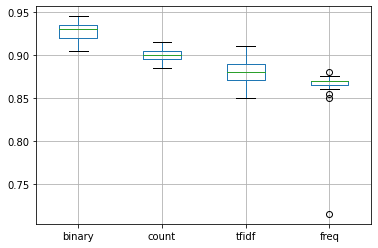

In [38]:
import pandas as pd

# load the vocabulary
vocab_filename = 'vocab.txt'
vocab = load_doc(vocab_filename)
vocab = set(vocab.split())

# load all reviews
train_docs, y_train = load_clean_dataset(path, vocab, True)
test_docs, y_test = load_clean_dataset(path, vocab, False)

# run experiment
modes = ['binary', 'count', 'tfidf', 'freq']
results = pd.DataFrame()

for mode in modes:
    # prepare data for mode
    x_train, x_test = prepare_data(train_docs, test_docs, mode)
    
    # evaluate model on data for mode
    results[mode] = evaluate_mode(x_train, y_train, x_test, y_test)
    
# summarize results
print(results.describe())


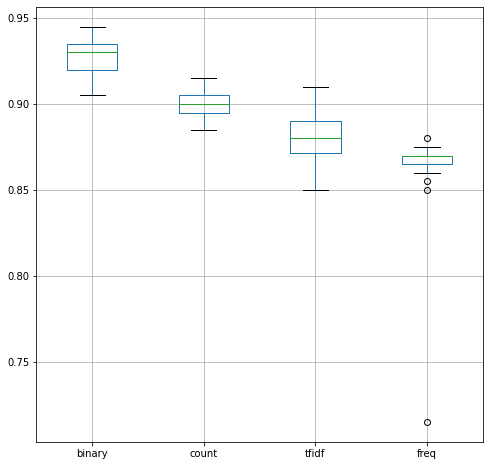

In [43]:
import matplotlib.pyplot as plt

# plot results
results.boxplot(figsize=(8, 8))
plt.show()

#### Predicting Sentiemnt for New Reviews

In [48]:
# classify a review as negative or positive
def predict_sentiment(review, vocab, tokenizer, model):
    # clean document
    tokens = clean_doc(review)
    
    # filter by vocab
    tokens = [w for w in tokens if w in vocab]
    
    # convert to line
    line = ' '.join(tokens)
    
    # encode
    encoded = tokenizer.texts_to_matrix([line], mode='binary')
    
    # predict sentiment
    yhat = model.predict(encoded, verbose=0)
    
    # retrieve predicted percentage and label
    percent_pos = yhat[0, 0]
    
    if round(percent_pos):
        return percent_pos, 'Positive'
    else:
        return 1 - percent_pos, 'Negative'

In [50]:
# test positive text
text = 'Best movie ever! It was great, I recommend it.'
percent, sentiment = predict_sentiment(text, vocab, tokenizer, model)
print(f'review: {text}')
print(f'SEntiment: {sentiment} {percent * 100:.3f} %')

review: Best movie ever! It was great, I recommend it.
SEntiment: Positive 100.000 %
